In [2]:
# Importing libraries

import numpy as np
import seaborn as sns
import os, sys, warnings
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
import pandas as pd


from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [3]:
import logging
#Logging is a means of tracking events that happen when some software runs
# Create and configure logger
logging.basicConfig(filename="../logs/newfile.log",
                    format='%(asctime)s %(message)s',
                    filemode='w')
 
# Creating an object
logger = logging.getLogger()
 
# Setting the threshold of logger to DEBUG
logger.setLevel(logging.DEBUG)
 
# Test messages
logger.debug("Harmless debug Message")
logger.info("Just an information")
logger.warning("Its a Warning")
logger.error("Did you try to divide by zero")
logger.critical("Internet is down")

In [4]:
%matplotlib inline
import sys
sys.path.insert(0,'../scripts/')

In [5]:
from data_loader import load_df_from_csv
from data_struct import DataInfo
from data_cleaner import DataCleaner
%matplotlib inline
import sys
sys.path.insert(0,'../scripts/')

In [6]:
missing_values = ["n/a", "na", "undefined",'']
df= load_df_from_csv("../data/clean_data.csv",na_values=missing_values)

In [7]:
df.head()

,Unnamed: 0,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,M,17.990000,10.380000,122.800003,1001.000000,0.11840,0.27760,0.3001,0.14710,...,25.379999,17.330000,184.600006,2019.000000,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,M,20.570000,17.770000,132.899994,1326.000000,0.08474,0.07864,0.0869,0.07017,...,24.990000,23.410000,158.800003,1956.000000,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,2,M,19.690001,21.250000,130.000000,1203.000000,0.10960,0.15990,0.1974,0.12790,...,23.570000,25.530001,152.500000,1709.000000,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,3,M,11.420000,20.379999,77.580002,386.100006,0.14250,0.28390,0.2414,0.10520,...,14.910000,26.500000,98.870003,567.700012,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,4,M,20.290001,14.340000,135.100006,1297.000000,0.10030,0.13280,0.1980,0.10430,...,22.540001,16.670000,152.199997,1575.000000,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
clean = DataCleaner(df)

In [9]:
clean.remove_unwanted_columns("Unnamed: 0")
df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.800003,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.379999,17.33,184.600006,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.899994,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.990000,23.41,158.800003,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


Data Split

In [10]:
# Y includes our labels and X includes our features

Y = df['diagnosis']
X = df.drop(columns = ['diagnosis'], axis=1)


# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((455, 30), (114, 30))

In [11]:
# Keep a copy of the dataset with all the variables

X_train_original = x_train.copy()
X_test_original = x_test.copy()

Data without chages

Accuracy is:  0.9649122807017544


<AxesSubplot:>

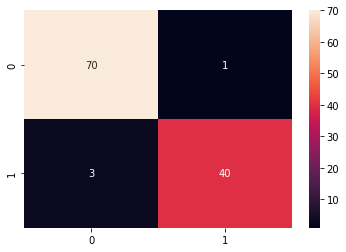

In [12]:
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train_original,y_train)

ac = accuracy_score(y_test,clf_rf.predict(X_test_original))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(X_test_original))
sns.heatmap(cm,annot=True,fmt="d")

### Remove Correlated features

In [13]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(x_train, 0.7)
print('correlated features: ', len(set(corr_features)) )

correlated features:  20


In [14]:
corr_features

{'area_mean',
 'area_se',
 'area_worst',
 'compactness_se',
 'compactness_worst',
 'concave points_mean',
 'concave points_se',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'fractal_dimension_se',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_se',
 'radius_worst',
 'smoothness_worst',
 'texture_worst'}

This makes sese as these are derivatives of each other.

In [15]:
# removed correlated  features
x_train.drop(labels=corr_features, axis=1, inplace=True)
x_test.drop(labels=corr_features, axis=1, inplace=True)

x_train.shape, x_test.shape

/tmp/ipykernel_6403/3740671623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.drop(labels=corr_features, axis=1, inplace=True)
/tmp/ipykernel_6403/3740671623.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.drop(labels=corr_features, axis=1, inplace=True)


((455, 10), (114, 10))

In [16]:
x_train.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se,symmetry_worst
68,9.029,17.330000,0.10660,0.14130,0.2111,0.08046,1.1940,0.009549,0.04197,0.4228
181,21.090,26.570000,0.11410,0.28320,0.2395,0.07398,0.7629,0.004253,0.01798,0.4098
63,9.173,13.860000,0.07721,0.08751,0.2341,0.06963,2.2650,0.008738,0.04192,0.3282
248,10.650,25.219999,0.09657,0.07234,0.1897,0.06329,1.4930,0.007189,0.02158,0.3409
60,10.170,14.880000,0.11340,0.08061,0.2743,0.06960,1.4410,0.007514,0.04183,0.3557


In [17]:
# keep a copy of the dataset at  this stage
x_train_corr = x_train.copy()
x_test_corr = x_test.copy()

Accuracy is:  0.9298245614035088


<AxesSubplot:>

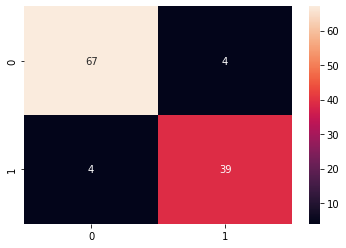

In [18]:
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train_corr,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test_corr))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test_corr))
sns.heatmap(cm,annot=True,fmt="d")

The accuracy drops

### Remove features using univariate roc_auc

In [19]:
# Y includes our labels and X includes our features

Y = df['diagnosis']
X = df.drop(columns = ['diagnosis'], axis=1)


# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((455, 30), (114, 30))

Remove features using univariate roc_auc

In [20]:
# find important features using univariate roc-auc

# loop to build a tree, make predictions and get the roc-auc
# for each feature of the train set

roc_values = []
for feature in x_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(x_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(x_test[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

<AxesSubplot:>

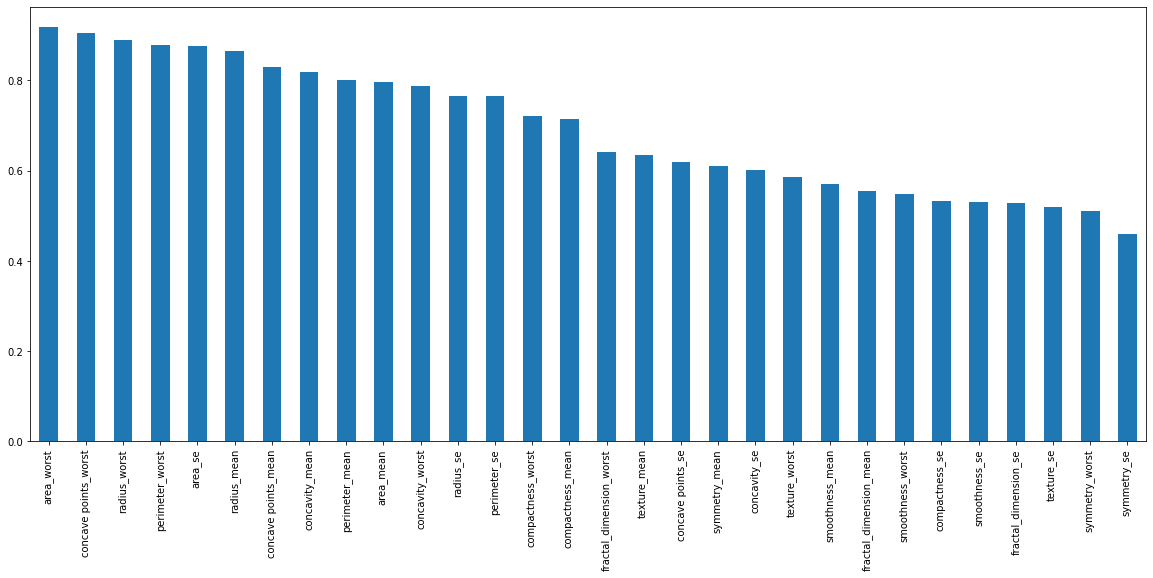

In [21]:
# let's add the variable names and order it for clearer visualisation
roc_values = pd.Series(roc_values)
roc_values.index = x_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 8))


In [22]:
# by removing features with univariate roc_auc == 0.8
# we remove another 30 features

selected_feat = roc_values[roc_values>0.78]
len(selected_feat), x_train.shape[1]

(11, 30)

In [23]:
selected_feat

radius_mean             0.865870
perimeter_mean          0.799869
area_mean               0.797085
concavity_mean          0.818867
concave points_mean     0.829021
area_se                 0.875860
radius_worst            0.889125
perimeter_worst         0.878808
area_worst              0.917458
concavity_worst         0.786276
concave points_worst    0.905830
dtype: float64

In [24]:
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.330000,58.790001,250.500000,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.31,22.650000,65.500000,324.700012,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.570000,142.699997,1311.000000,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.68,33.480000,176.500000,2089.000000,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.860000,59.200001,260.899994,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.01,19.230000,65.589996,310.100006,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.219999,68.010002,347.000000,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.25,35.189999,77.980003,455.700012,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.880000,64.550003,311.899994,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.02,17.450001,69.860001,368.600006,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020


Accuracy is:  0.9649122807017544


<AxesSubplot:>

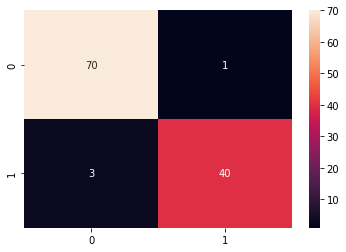

In [25]:
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

feature accuracy goes up

In [26]:
# Y includes our labels and X includes our features

Y = df['diagnosis']
X = df.drop(columns = ['diagnosis'], axis=1)


# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((455, 30), (114, 30))

### Remove quasi-constant features

In [27]:
# remove quasi-constant features
# 0.1 indicates 99% of observations approximately
sel = VarianceThreshold(threshold=0.3)  
# fit finds the features with low variance
sel.fit(x_train)  
# how many not quasi-constant?
sum(sel.get_support()) 

10

In [28]:
features_to_keep = x_train.columns[sel.get_support()]

In [29]:
# we can then remove the features like this
X_train = sel.transform(x_train)
X_test = sel.transform(x_test)

X_train.shape, X_test.shape

((455, 10), (114, 10))

In [30]:
# sklearn transformations lead to numpy arrays
# here we transform the arrays back to dataframes
# please be mindful of getting the columns assigned
# correctly

X_train= pd.DataFrame(X_train)
X_train.columns = features_to_keep

X_test= pd.DataFrame(X_test)
X_test.columns = features_to_keep

In [31]:
X_test.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'perimeter_se', 'area_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst'],
      dtype='object')

Accuracy is:  0.9649122807017544


<AxesSubplot:>

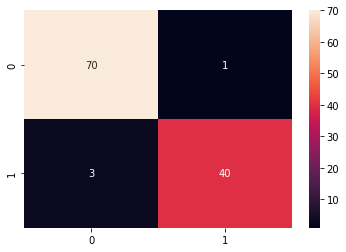

In [32]:
#random forest classifier with n_estimators=10 (default)
rf_2 = RandomForestClassifier(random_state=43)      
rf_2 = rf_2.fit(x_train,y_train)

ac = accuracy_score(y_test,rf_2.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,rf_2.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

We see that the accuracy is pretty similarr.

## Feature Selection using Random Forest Classifier Feature Importance
The Random Forest algorithm has built-in feature importance selection method to find only the important features. Features that are selected at the top of the trees are in general more important than features that are selected at the end nodes of the trees, as generally the top splits lead to bigger information gain.

In [33]:
# Y includes our labels and X includes our features

Y = df['diagnosis']
X = df.drop(columns = ['diagnosis'], axis=1)


# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((455, 30), (114, 30))

In [34]:
rf_3 = RandomForestClassifier()      
rf_3 = rf_3.fit(x_train,y_train)
importances = rf_3.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_3.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 22 (0.160094)
2. feature 7 (0.139435)
3. feature 27 (0.112523)
4. feature 20 (0.110428)
5. feature 23 (0.079813)
6. feature 6 (0.060848)
7. feature 2 (0.060423)
8. feature 3 (0.039858)
9. feature 5 (0.028980)
10. feature 0 (0.023677)
11. feature 26 (0.020838)
12. feature 21 (0.019089)
13. feature 24 (0.013932)
14. feature 12 (0.012435)
15. feature 1 (0.012273)
16. feature 13 (0.012271)
17. feature 28 (0.012167)
18. feature 25 (0.010074)
19. feature 10 (0.008494)
20. feature 4 (0.007556)
21. feature 16 (0.006939)
22. feature 19 (0.006590)
23. feature 15 (0.006400)
24. feature 11 (0.006344)
25. feature 18 (0.006343)
26. feature 8 (0.005789)
27. feature 9 (0.004834)
28. feature 14 (0.004524)
29. feature 29 (0.003966)
30. feature 17 (0.003060)


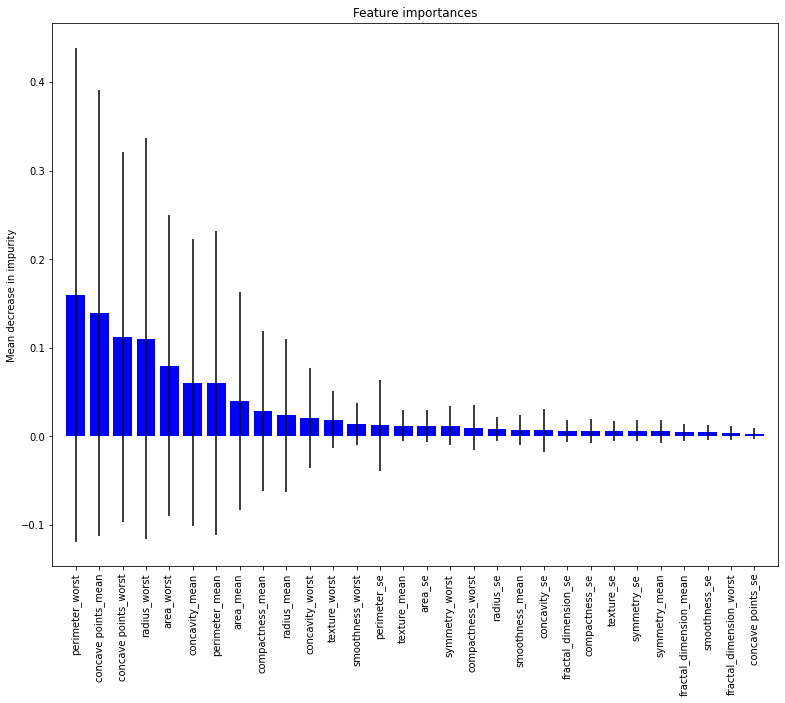

In [35]:
# Plot the feature importances of the forest

plt.figure(1, figsize=(13, 10))
plt.title("Feature importances")
plt.ylabel("Mean decrease in impurity")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

Accuracy is:  0.9590643274853801


<AxesSubplot:>

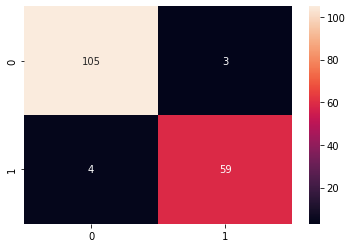

In [36]:
columns = ['perimeter_worst', 'concave points_worst', 'concave points_mean', 'area_worst', 'radius_worst', 'perimeter_mean', 
            'concavity_mean', 'concavity_worst', 'area_mean', 'area_se']

X = df[columns]
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

We  get the highest accuraccy scores from Remove quasi-constant features,with these cols:'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'perimeter_se', 'area_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst'

There is a tie with Remove features using univariate roc_auc ,with these cols:
radius_mean             
perimeter_mean         
area_mean               
concavity_mean          
concave points_mean     
area_se                 
radius_worst            
perimeter_worst         
area_worst              
concavity_worst        
concave points_worst

In [37]:
columns = ['area_worst', 'area_mean', 'area_se', 'perimeter_worst', 'perimeter_mean', 
        'radius_worst', 'radius_mean', 'perimeter_se', 'texture_worst', 'texture_mean']
features = df[columns]
features.insert(loc=0, column='diagnosis', value=Y)


In [38]:
clean = DataCleaner(features)

In [39]:
clean_train= clean.save_clean_data('../data/features_data.csv')

In [40]:
data=pd.read_csv('../data/features_data.csv')

In [41]:
data.head()

,Unnamed: 0,diagnosis,area_worst,area_mean,area_se,perimeter_worst,perimeter_mean,radius_worst,radius_mean,perimeter_se,texture_worst,texture_mean
0,0,M,2019.0,1001.0,153.40,184.60,122.80,25.38,17.99,8.589,17.33,10.38
1,1,M,1956.0,1326.0,74.08,158.80,132.90,24.99,20.57,3.398,23.41,17.77
2,2,M,1709.0,1203.0,94.03,152.50,130.00,23.57,19.69,4.585,25.53,21.25
3,3,M,567.7,386.1,27.23,98.87,77.58,14.91,11.42,3.445,26.50,20.38
4,4,M,1575.0,1297.0,94.44,152.20,135.10,22.54,20.29,5.438,16.67,14.34
